# IRCDL 20-year retrospective

In [1]:
import os
import json, csv
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval


Data already provided in the `data/raw` folder as downloaded from DBLP at the URL https://dblp.org/search/publ/api?q=stream%3Astreams%2Fconf%2Fircdl%3A&h=1000&format=json.

Uncomment the following cell and execute to fetch raw data from DBLP.

In [2]:
dblp = 'https://dblp.org/search/publ/api?q=stream%3Astreams%2Fconf%2Fircdl%3A&h=1000&format=json'
dblp_path = '../data/raw/ircdl_dblp.json'

In [3]:
# from urllib.request import urlretrieve

# urlretrieve(dblp, dblp_path)

## Process raw data

In [4]:
csv_path = '../data/processed/ircdl_dblp.csv'

with open(dblp_path, 'r') as dblp_file, open(csv_path, 'w') as csv_file:
    dblp = json.load(dblp_file)

    writer = csv.writer(csv_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(['key', 'doi', 'url', 'ee', 'year', 'authors', 'title', 'venue', 'pages', 'length', 'type', 'access'])
    for hit in dblp['result']['hits']['hit']:
        paper = hit['info']
        
        if 'authors' in paper:
            # authors = ', '.join([a['text'] for a in paper['authors']['author']]) if isinstance(paper['authors']['author'], list) else paper['authors']['author']['text']
            authors = [a['text'] for a in paper['authors']['author']] if isinstance(paper['authors']['author'], list) else [paper['authors']['author']['text']]
        else:
            authors = []

        key = paper['key'] if 'key' in paper else None
        doi = paper['doi'] if 'doi' in paper else None
        access = paper['access'] if 'access' in paper else None
        ee = paper['ee'] if 'ee' in paper else None
        range = paper['pages'] if 'pages' in paper else None
        venue = paper['venue'] if 'venue' in paper else None
        if range is not None:
            pages = range.split('-')
            length = int(pages[1]) - int(pages[0])
        else:
            length = None
        
        writer.writerow([key, doi, paper['url'], ee, paper['year'], authors, paper['title'], venue, range, length, paper['type'], access])

## Analysis

Load DBLP data

In [5]:
df = pd.read_csv('../data/processed/ircdl_dblp.csv')
df.authors = df.authors.apply(literal_eval)

df.head(5)

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
0,conf/ircdl/AmbrosinoAPS23,NaN,https://dblp.org/rec/conf/ircdl/AmbrosinoAPS23,https://ceur-ws.org/Vol-3365/short16.pdf,2023,"[Maria Anna Ambrosino, Vanja Annunziata, Maria...",The Hetor project: a joint effort to co-create...,IRCDL,216-224,8.0,Conference and Workshop Papers,open
1,conf/ircdl/BagchiD23,NaN,https://dblp.org/rec/conf/ircdl/BagchiD23,https://ceur-ws.org/Vol-3365/short1.pdf,2023,"[Mayukh Bagchi, Subhashis Das]",Disentangling Domain Ontologies.,IRCDL,17-28,11.0,Conference and Workshop Papers,open
2,conf/ircdl/BaglioniMPBM23,NaN,https://dblp.org/rec/conf/ircdl/BaglioniMPBM23,https://ceur-ws.org/Vol-3365/paper2.pdf,2023,"[Miriam Baglioni, Andrea Mannocci, Gina Pavone...",(Semi)automated disambiguation of scholarly re...,IRCDL,47-59,12.0,Conference and Workshop Papers,open
3,conf/ircdl/BarbutiBRCP23,NaN,https://dblp.org/rec/conf/ircdl/BarbutiBRCP23,https://ceur-ws.org/Vol-3365/short17.pdf,2023,"[Nicola Barbuti, Mauro De Bari, Stefania Riso,...",The Open Memory Apulia Project. How Open Data ...,IRCDL,225-232,7.0,Conference and Workshop Papers,open
4,conf/ircdl/BardiBM23,NaN,https://dblp.org/rec/conf/ircdl/BardiBM23,https://ceur-ws.org/Vol-3365/short12.pdf,2023,"[Alessia Bardi, Margo Bargheer, Paolo Manghi]",A Discovery Hub for Diamond Open Access publis...,IRCDL,162-166,4.0,Conference and Workshop Papers,open


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      419 non-null    object 
 1   doi      249 non-null    object 
 2   url      419 non-null    object 
 3   ee       366 non-null    object 
 4   year     419 non-null    int64  
 5   authors  419 non-null    object 
 6   title    419 non-null    object 
 7   venue    419 non-null    object 
 8   pages    366 non-null    object 
 9   length   366 non-null    float64
 10  type     419 non-null    object 
 11  access   407 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 39.4+ KB


Examine type field

In [7]:
df.type.value_counts()

type
Conference and Workshop Papers    398
Editorship                         21
Name: count, dtype: int64

Filter papers only

In [8]:
papers = df[df.type == 'Conference and Workshop Papers']
papers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 417
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      398 non-null    object 
 1   doi      238 non-null    object 
 2   url      398 non-null    object 
 3   ee       349 non-null    object 
 4   year     398 non-null    int64  
 5   authors  398 non-null    object 
 6   title    398 non-null    object 
 7   venue    398 non-null    object 
 8   pages    366 non-null    object 
 9   length   366 non-null    float64
 10  type     398 non-null    object 
 11  access   398 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 40.4+ KB


Check venues

In [9]:
papers.venue.value_counts()

venue
IRCDL           370
VIPERC@IRCDL     18
NLP4DL/AT4DL     10
Name: count, dtype: int64

Spurous venue at DBLP; filter IRCDL only

In [10]:
papers = papers[papers.venue == 'IRCDL']
papers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 370 entries, 0 to 417
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      370 non-null    object 
 1   doi      228 non-null    object 
 2   url      370 non-null    object 
 3   ee       321 non-null    object 
 4   year     370 non-null    int64  
 5   authors  370 non-null    object 
 6   title    370 non-null    object 
 7   venue    370 non-null    object 
 8   pages    338 non-null    object 
 9   length   338 non-null    float64
 10  type     370 non-null    object 
 11  access   370 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 37.6+ KB


Checking paper length

<Axes: >

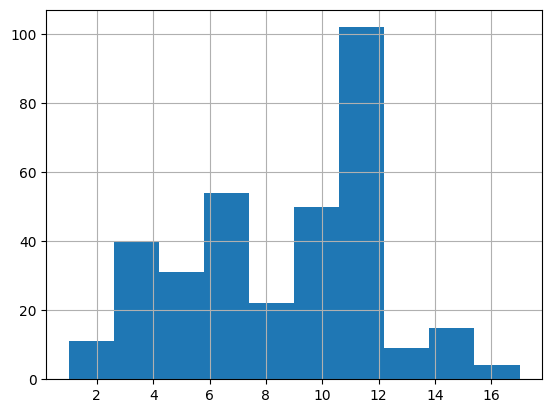

In [11]:
papers.length.hist()

Tell long and short papers apart (assumption on paper lenght)

In [12]:
long = papers[papers.length >= 10]
short = papers[papers.length < 10]
long.head()

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
1,conf/ircdl/BagchiD23,NaN,https://dblp.org/rec/conf/ircdl/BagchiD23,https://ceur-ws.org/Vol-3365/short1.pdf,2023,"[Mayukh Bagchi, Subhashis Das]",Disentangling Domain Ontologies.,IRCDL,17-28,11.0,Conference and Workshop Papers,open
2,conf/ircdl/BaglioniMPBM23,NaN,https://dblp.org/rec/conf/ircdl/BaglioniMPBM23,https://ceur-ws.org/Vol-3365/paper2.pdf,2023,"[Miriam Baglioni, Andrea Mannocci, Gina Pavone...",(Semi)automated disambiguation of scholarly re...,IRCDL,47-59,12.0,Conference and Workshop Papers,open
5,conf/ircdl/BernasconiCM23,NaN,https://dblp.org/rec/conf/ircdl/BernasconiCM23,https://ceur-ws.org/Vol-3365/paper1.pdf,2023,"[Eleonora Bernasconi, Miguel Ceriani, Massimo ...",Linked Data interfaces: a survey.,IRCDL,1-16,15.0,Conference and Workshop Papers,open
8,conf/ircdl/DeglInnocentiCC23,NaN,https://dblp.org/rec/conf/ircdl/DeglInnocentiCC23,https://ceur-ws.org/Vol-3365/paper5.pdf,2023,"[Emiliano Degl&apos;Innocenti, Leonardo Canova...",The RESTORE project: a final review.,IRCDL,167-179,12.0,Conference and Workshop Papers,open
10,conf/ircdl/GemelliVM23,NaN,https://dblp.org/rec/conf/ircdl/GemelliVM23,https://ceur-ws.org/Vol-3365/short14.pdf,2023,"[Andrea Gemelli, Emanuele Vivoli, Simone Marinai]",CTE: A Dataset for Contextualized Table Extrac...,IRCDL,197-208,11.0,Conference and Workshop Papers,open


In [13]:
short.head()

,key,doi,url,ee,year,authors,title,venue,pages,length,type,access
0,conf/ircdl/AmbrosinoAPS23,NaN,https://dblp.org/rec/conf/ircdl/AmbrosinoAPS23,https://ceur-ws.org/Vol-3365/short16.pdf,2023,"[Maria Anna Ambrosino, Vanja Annunziata, Maria...",The Hetor project: a joint effort to co-create...,IRCDL,216-224,8.0,Conference and Workshop Papers,open
3,conf/ircdl/BarbutiBRCP23,NaN,https://dblp.org/rec/conf/ircdl/BarbutiBRCP23,https://ceur-ws.org/Vol-3365/short17.pdf,2023,"[Nicola Barbuti, Mauro De Bari, Stefania Riso,...",The Open Memory Apulia Project. How Open Data ...,IRCDL,225-232,7.0,Conference and Workshop Papers,open
4,conf/ircdl/BardiBM23,NaN,https://dblp.org/rec/conf/ircdl/BardiBM23,https://ceur-ws.org/Vol-3365/short12.pdf,2023,"[Alessia Bardi, Margo Bargheer, Paolo Manghi]",A Discovery Hub for Diamond Open Access publis...,IRCDL,162-166,4.0,Conference and Workshop Papers,open
6,conf/ircdl/CastellanoSV23,NaN,https://dblp.org/rec/conf/ircdl/CastellanoSV23,https://ceur-ws.org/Vol-3365/short13.pdf,2023,"[Giovanna Castellano, Raffaele Scaringi, Genna...",Automatic analysis of artistic heritage throug...,IRCDL,192-196,4.0,Conference and Workshop Papers,open
7,conf/ircdl/CastellucciC23,NaN,https://dblp.org/rec/conf/ircdl/CastellucciC23,https://ceur-ws.org/Vol-3365/short15.pdf,2023,"[Paola Castellucci, Gianfranco Crupi]","Put the hands on! For a movable, interactive, ...",IRCDL,209-215,6.0,Conference and Workshop Papers,open


### Diachronic analysis

In [14]:
papers.groupby('year').count()

,key,doi,url,ee,authors,title,venue,pages,length,type,access
year,,,,,,,,,,,
2006,14,0,14,0,14,14,14,14,14,14,14
2007,19,0,19,0,19,19,19,19,19,19,19
2008,16,0,16,0,16,16,16,16,16,16,16
2009,20,0,20,20,20,20,20,20,20,20,20
2010,20,20,20,20,20,20,20,20,20,20,20
2011,21,21,21,21,21,21,21,21,21,21,21
2012,26,26,26,26,26,26,26,26,26,26,26
2013,20,20,20,20,20,20,20,20,20,20,20
2014,23,23,23,23,23,23,23,23,23,23,23


<Axes: xlabel='year'>

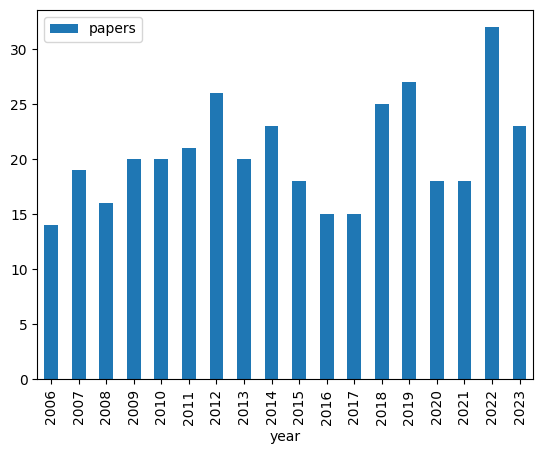

In [103]:
papers.rename(columns={'key': 'papers'}).groupby('year')[['papers']].count().plot.bar()

In [112]:
papers.groupby('year')[['key']].count().mean()

key    20.555556
dtype: float64

<Axes: xlabel='year'>

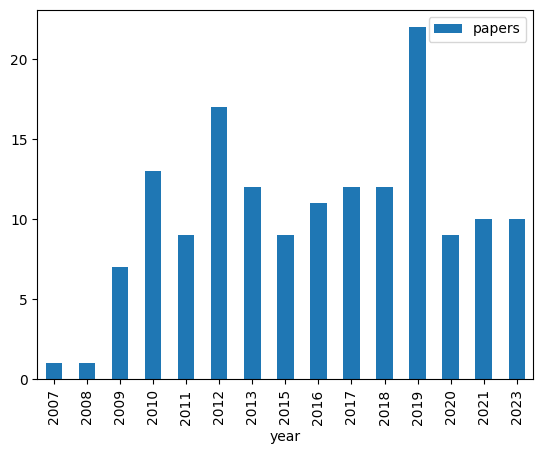

In [104]:
long.rename(columns={'key': 'papers'}).groupby('year')[['papers']].count().plot.bar()

<Axes: xlabel='year'>

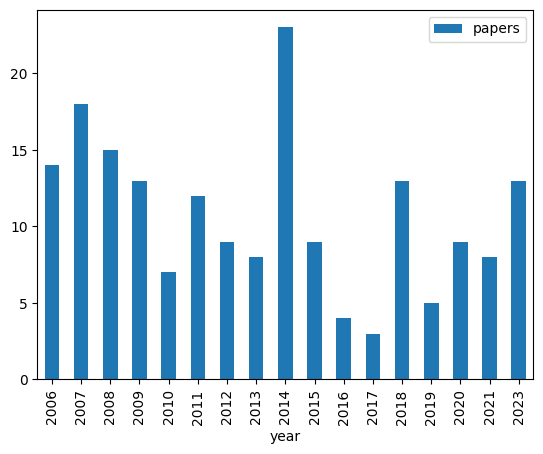

In [105]:
short.rename(columns={'key': 'papers'}).groupby('year')[['papers']].count().plot.bar()

### Top contributors

Explode authors of each single paper

In [18]:
long_contributors = long.authors.explode().value_counts()
long_contributors

authors
Stefano Ferilli            18
Floriana Esposito          13
Nicola Ferro 0001          12
Gianmaria Silvello         11
Giorgio Maria Di Nunzio     9
                           ..
Caterina Bergami            1
Alessandra Pugnetti         1
Laura Pandolfo              1
Luca Pulina                 1
Marco Degemmis              1
Name: count, Length: 320, dtype: int64

<Axes: xlabel='authors'>

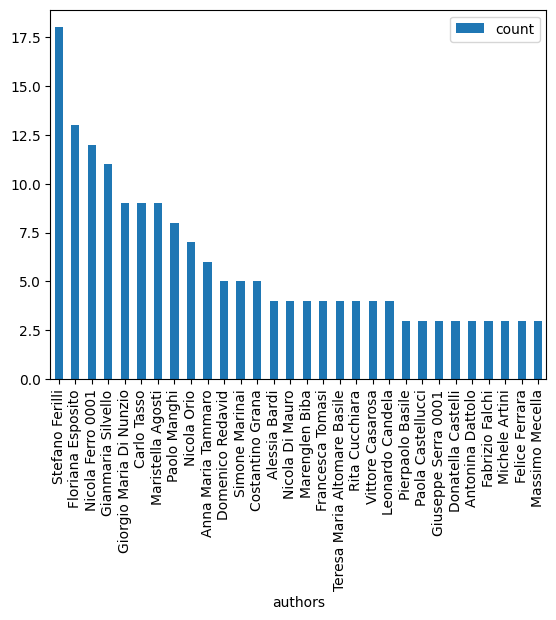

In [19]:
pd.DataFrame(long_contributors[:30]).plot.bar()

Filter out Steering Committee and Advisory Board members and find top contributors (assumption on number of **long papers** published)

In [20]:
to_filter = 'bimbo|manghi|agosti|ferilli|grana|poggi|serra|silvello|catarci|thanos|esposito|tasso'
top_long = long_contributors[(~long_contributors.index.str.lower().str.contains(to_filter)) & (long_contributors > 3)]
top_long

authors
Nicola Ferro 0001               12
Giorgio Maria Di Nunzio          9
Nicola Orio                      7
Anna Maria Tammaro               6
Domenico Redavid                 5
Simone Marinai                   5
Alessia Bardi                    4
Nicola Di Mauro                  4
Marenglen Biba                   4
Francesca Tomasi                 4
Teresa Maria Altomare Basile     4
Rita Cucchiara                   4
Vittore Casarosa                 4
Leonardo Candela                 4
Name: count, dtype: int64

<Axes: xlabel='authors'>

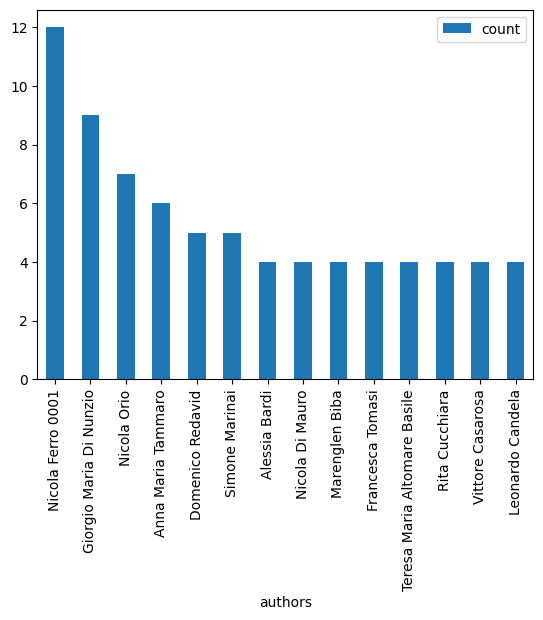

In [21]:
pd.DataFrame(top_long).plot.bar()

Repeat for **short papers**

In [22]:
short_contributors = short.authors.explode().value_counts()
short_contributors

authors
Nicola Ferro 0001       22
Gianmaria Silvello      14
Maristella Agosti       12
Nicola Orio             11
Paolo Manghi            11
                        ..
Laura Ciancio            1
Rosanna De Rosa 0001     1
Eleonora Pantò           1
Fabio Nascimbeni         1
Nicola Mastidoro         1
Name: count, Length: 319, dtype: int64

<Axes: xlabel='authors'>

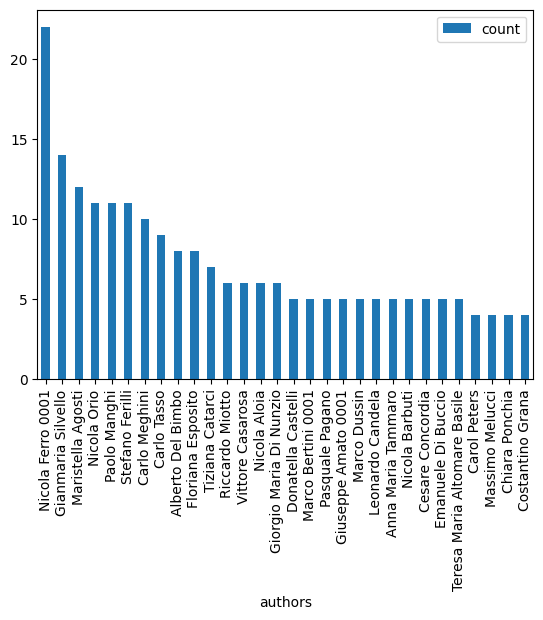

In [23]:
pd.DataFrame(short_contributors[:30]).plot.bar()

In [24]:
top_short = short_contributors[(~short_contributors.index.str.lower().str.contains(to_filter)) & (short_contributors > 3)]
top_short

authors
Nicola Ferro 0001               22
Nicola Orio                     11
Carlo Meghini                   10
Riccardo Miotto                  6
Vittore Casarosa                 6
Nicola Aloia                     6
Giorgio Maria Di Nunzio          6
Donatella Castelli               5
Marco Bertini 0001               5
Pasquale Pagano                  5
Giuseppe Amato 0001              5
Marco Dussin                     5
Leonardo Candela                 5
Anna Maria Tammaro               5
Nicola Barbuti                   5
Cesare Concordia                 5
Emanuele Di Buccio               5
Teresa Maria Altomare Basile     5
Carol Peters                     4
Massimo Melucci                  4
Chiara Ponchia                   4
Rita Cucchiara                   4
Pierpaolo Basile                 4
Alessia Bardi                    4
Nicola Di Mauro                  4
Name: count, dtype: int64

<Axes: xlabel='authors'>

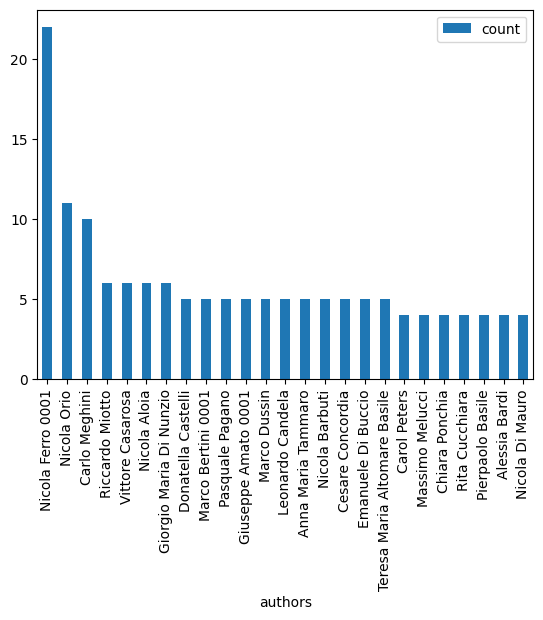

In [25]:
pd.DataFrame(top_short).plot.bar()

### Collaborations

In [204]:
import itertools as itr
couples = papers['authors'].apply(lambda authors: list(itr.combinations(authors, 2))).explode().dropna()
couples[:6]

0           (Maria Anna Ambrosino, Vanja Annunziata)
0    (Maria Anna Ambrosino, Maria Angela Pellegrino)
0           (Maria Anna Ambrosino, Vittorio Scarano)
0        (Vanja Annunziata, Maria Angela Pellegrino)
0               (Vanja Annunziata, Vittorio Scarano)
0        (Maria Angela Pellegrino, Vittorio Scarano)
Name: authors, dtype: object

In [183]:
import igraph as ig

G = ig.Graph.TupleList(
      edges=couples.to_list(),
      vertex_name_attr='name',
      directed=False
      )

In [184]:
G.vcount()

558

In [185]:
G.ecount()

1935

In [186]:
G.es['n_joint_papers'] = 1
G = G.simplify(combine_edges='sum')

In [187]:
G.vs[10]

igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 10, {'name': 'Paolo Manghi'})

In [188]:
G.vs['degree'] = G.degree()

In [189]:
G.vs[10]

igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 10, {'name': 'Paolo Manghi', 'degree': 35})

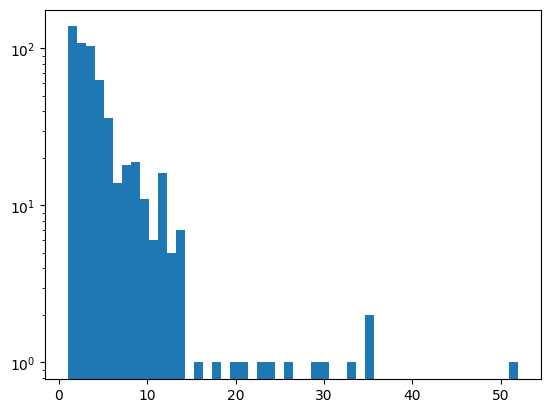

In [190]:
plt.hist(G.vs['degree'], 50)
plt.yscale('log')

In [191]:
highest_degree = sorted(G.vs, key=lambda v: v['degree'], reverse=True)
highest_degree[:25]

[igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 59, {'name': 'Nicola Ferro 0001', 'degree': 52}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 10, {'name': 'Paolo Manghi', 'degree': 35}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 203, {'name': 'Maristella Agosti', 'degree': 35}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 63, {'name': 'Gianmaria Silvello', 'degree': 33}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 148, {'name': 'Tiziana Catarci', 'degree': 30}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 58, {'name': 'Giorgio Maria Di Nunzio', 'degree': 29}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 56, {'name': 'Stefano Ferilli', 'degree': 26}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 75, {'name': 'Nicola Orio', 'degree': 24}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 170, {'name': 'Carlo Tasso', 'degree': 23}),
 igraph.Vertex(<igraph.Graph object at 0x129d89f50>, 72, {'name': 'Anna Maria Tammar

<Axes: xlabel='name'>

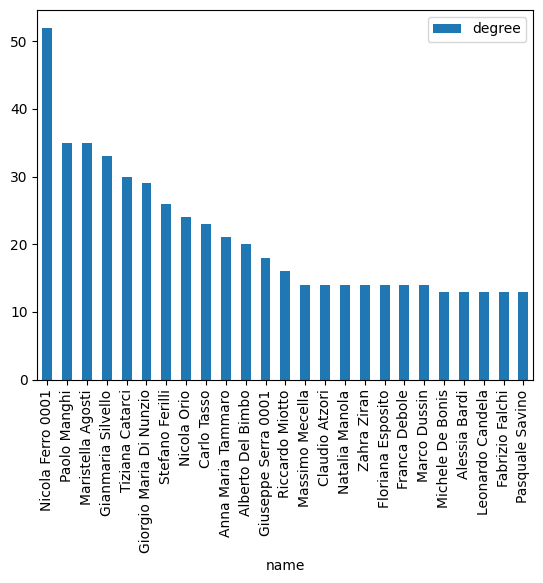

In [192]:
pd.DataFrame([(n['name'], n['degree']) for n in highest_degree], columns=['name', 'degree'])[:25].plot.bar(x='name')


In [193]:
highest_collab = sorted(G.es, key=lambda v: v['n_joint_papers'], reverse=True)
for e in highest_collab[:35]:
    print(G.vs[e.source]['name'] + ' + ' + G.vs[e.target]['name'] + ' = ' + str(e['n_joint_papers']))

Stefano Ferilli + Floriana Esposito = 17.0
Nicola Ferro 0001 + Gianmaria Silvello = 17.0
Stefano Ferilli + Domenico Redavid = 9.0
Leonardo Candela + Donatella Castelli = 9.0
Floriana Esposito + Teresa Maria Altomare Basile = 9.0
Paolo Manghi + Alessia Bardi = 8.0
Stefano Ferilli + Teresa Maria Altomare Basile = 8.0
Floriana Esposito + Nicola Di Mauro = 8.0
Nicola Ferro 0001 + Maristella Agosti = 7.0
Leonardo Candela + Pasquale Pagano = 7.0
Costantino Grana + Rita Cucchiara = 7.0
Andrea Mannocci + Paolo Manghi = 6.0
Stefano Ferilli + Marenglen Biba = 6.0
Giorgio Maria Di Nunzio + Nicola Ferro 0001 = 6.0
Giorgio Maria Di Nunzio + Maristella Agosti = 6.0
Gianmaria Silvello + Maristella Agosti = 6.0
Nicola Orio + Riccardo Miotto = 6.0
Donatella Castelli + Pasquale Pagano = 6.0
Carlo Meghini + Nicola Aloia = 6.0
Floriana Esposito + Marenglen Biba = 6.0
Paolo Manghi + Leonardo Candela = 5.0
Paolo Manghi + Claudio Atzori = 5.0
Paolo Manghi + Sandro La Bruzzo = 5.0
Paolo Manghi + Michele Artin

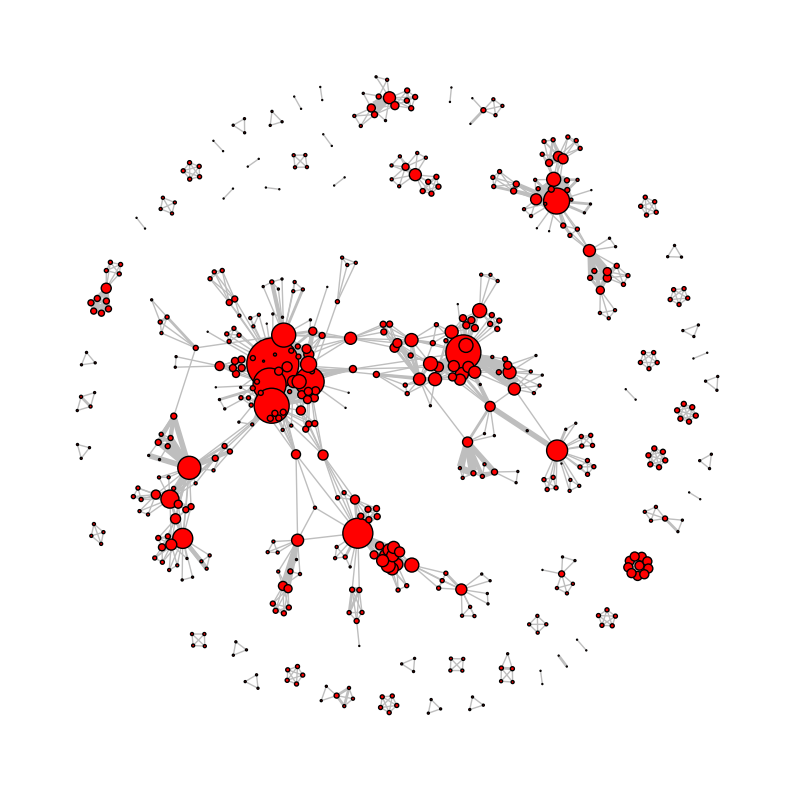

In [194]:
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(G, target=ax, vertex_size=G.vs['degree'], edge_width=G.es['n_joint_papers'], edge_color='gray')

In [195]:
components = G.connected_components()
components

In [196]:
len(components)

56

In [197]:
H = components.giant()
H.summary()

'IGRAPH UN-- 284 891 -- \n+ attr: degree (v), name (v), n_joint_papers (e)'

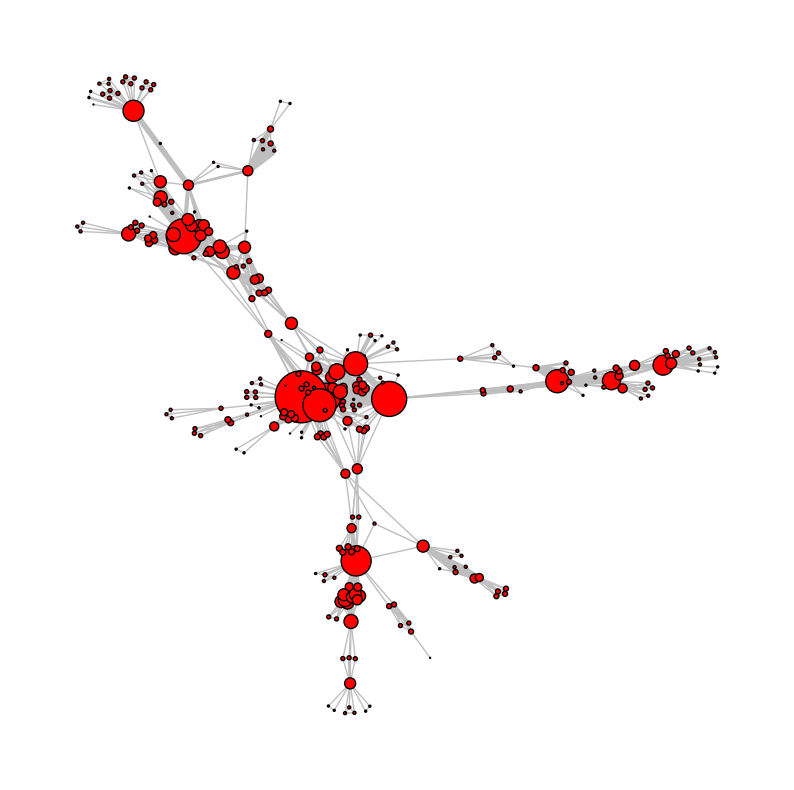

In [198]:
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(H, target=ax, vertex_size=H.vs['degree'], edge_width=H.es['n_joint_papers'], edge_color='gray')

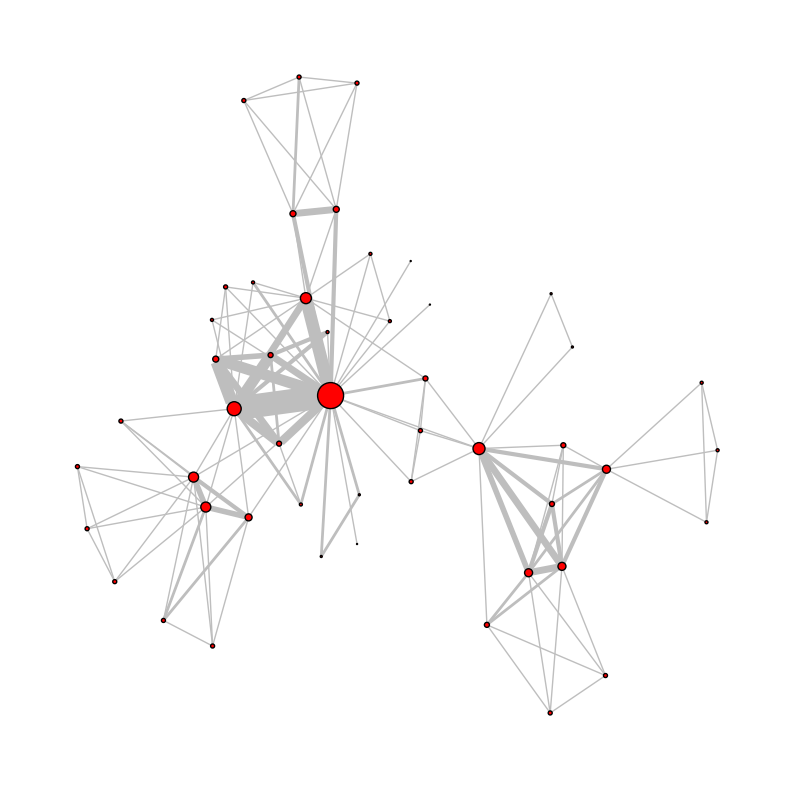

In [201]:
H = components.subgraphs()[3]
fig, ax = fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(H, target=ax, vertex_size=H.vs['degree'], edge_width=H.es['n_joint_papers'], edge_color='gray')

In [202]:
print(H)

IGRAPH UN-- 49 128 --
+ attr: degree (v), name (v), n_joint_papers (e)
+ edges (vertex names):
              Nicola Barbuti -- Mauro De Bari, Stefania Riso, Tommaso
Caldarola, Francesco Piero Paolicelli, Stefano Ferilli, Domenico Redavid
               Mauro De Bari -- Nicola Barbuti, Stefania Riso, Tommaso
Caldarola, Francesco Piero Paolicelli
               Stefania Riso -- Nicola Barbuti, Mauro De Bari, Tommaso
Caldarola, Francesco Piero Paolicelli
           Tommaso Caldarola -- Nicola Barbuti, Mauro De Bari, Stefania Riso,
Francesco Piero Paolicelli, Stefano Ferilli, Domenico Redavid
  Francesco Piero Paolicelli -- Nicola Barbuti, Mauro De Bari, Stefania Riso,
Tommaso Caldarola
         Barbara McGillivray -- Pierluigi Cassotti, Pierpaolo Basile, Davide
Di Pierro, Stefano Ferilli
          Pierluigi Cassotti -- Barbara McGillivray, Pierpaolo Basile, Davide
Di Pierro, Stefano Ferilli
            Pierpaolo Basile -- Barbara McGillivray, Pierluigi Cassotti,
Davide Di Pierro, Stefano 

/var/folders/j8/sgmsw3_510nbtw4brgpr222r0000gn/T/ipykernel_20267/1470163350.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(2, 2))


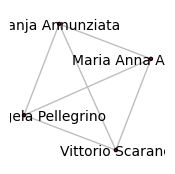

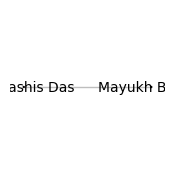

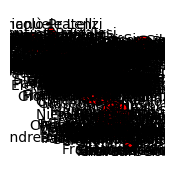

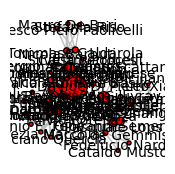

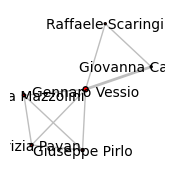

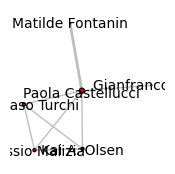

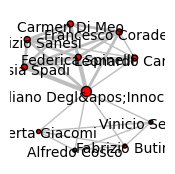

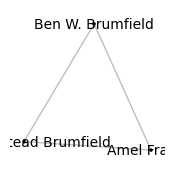

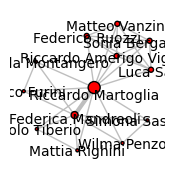

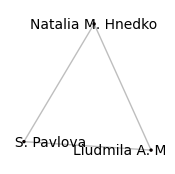

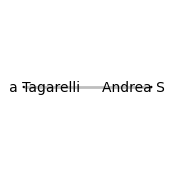

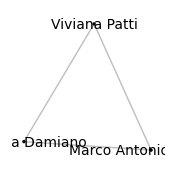

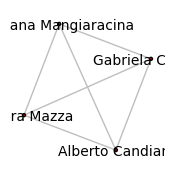

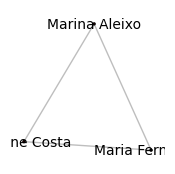

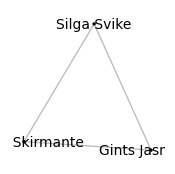

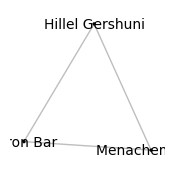

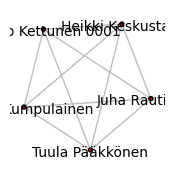

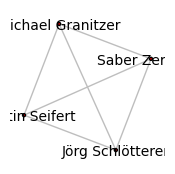

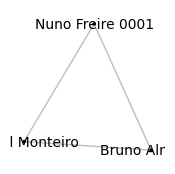

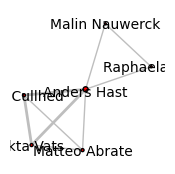

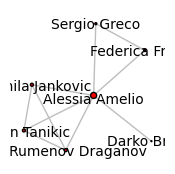

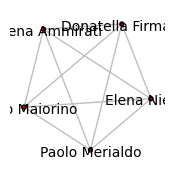

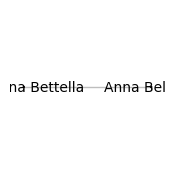

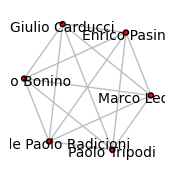

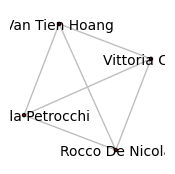

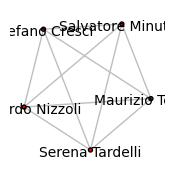

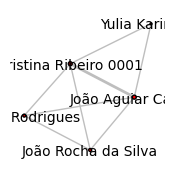

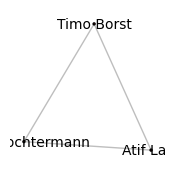

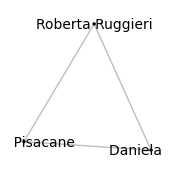

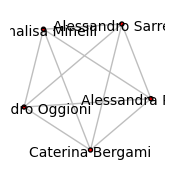

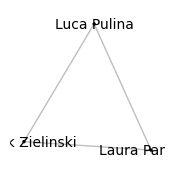

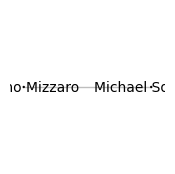

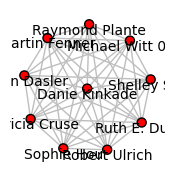

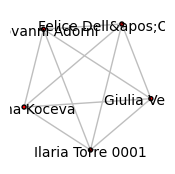

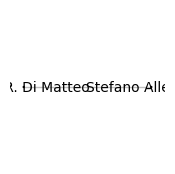

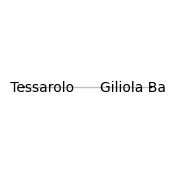

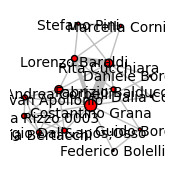

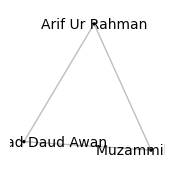

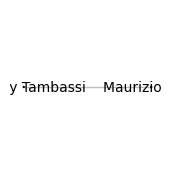

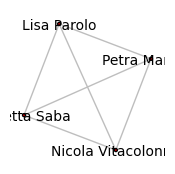

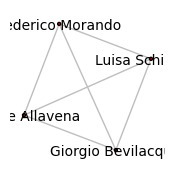

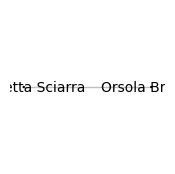

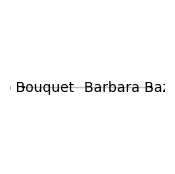

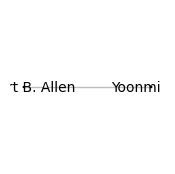

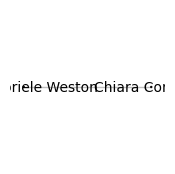

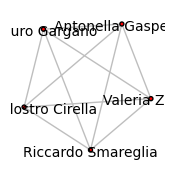

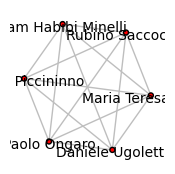

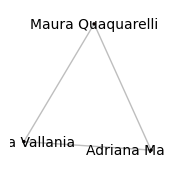

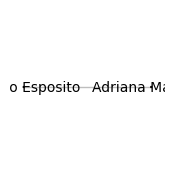

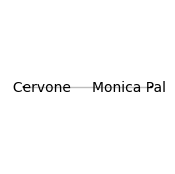

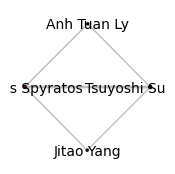

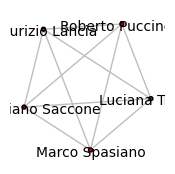

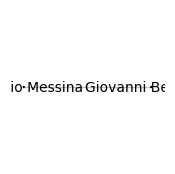

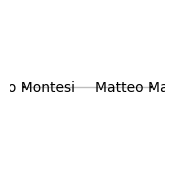

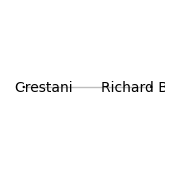

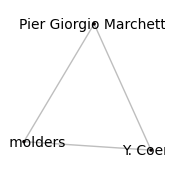

In [206]:
for cluster in components.subgraphs():
    fig, ax = plt.subplots(figsize=(2, 2))
    ig.plot(cluster, target=ax, vertex_size=cluster.vs['degree'], edge_width=cluster.es['n_joint_papers'], vertex_label=cluster.vs['name'], vertex_label_size=10, vertex_label_dist=1, edge_color='gray')

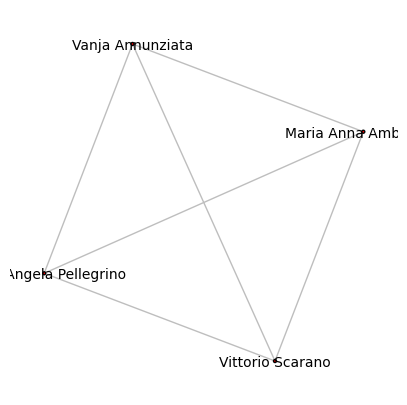

In [208]:
fig, ax = plt.subplots(figsize=(5, 5))
cluster = components.subgraphs()[0]
ig.plot(cluster, target=ax, vertex_size=cluster.vs['degree'], edge_width=cluster.es['n_joint_papers'], vertex_label=cluster.vs['name'], vertex_label_size=10, vertex_label_dist=1, edge_color='gray')

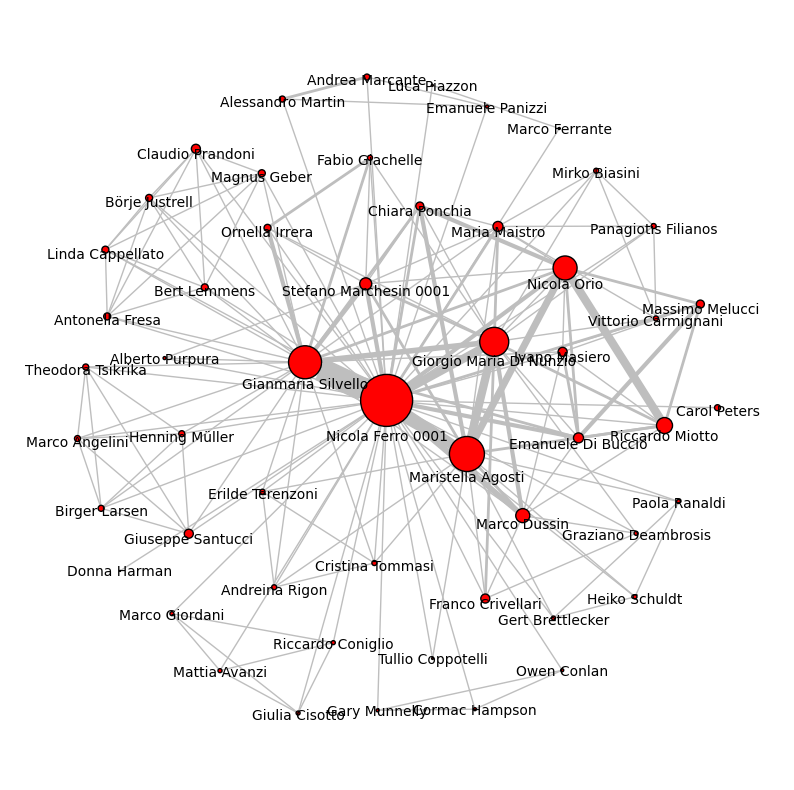

In [180]:
I = G.induced_subgraph(G.neighborhood(G.vs.find(name_eq = 'Nicola Ferro 0001').index))
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(I, target=ax, vertex_size=I.vs['degree'], edge_width=I.es['n_joint_papers'], vertex_label=I.vs['name'], vertex_label_size=10, vertex_label_dist=1, edge_color='gray')

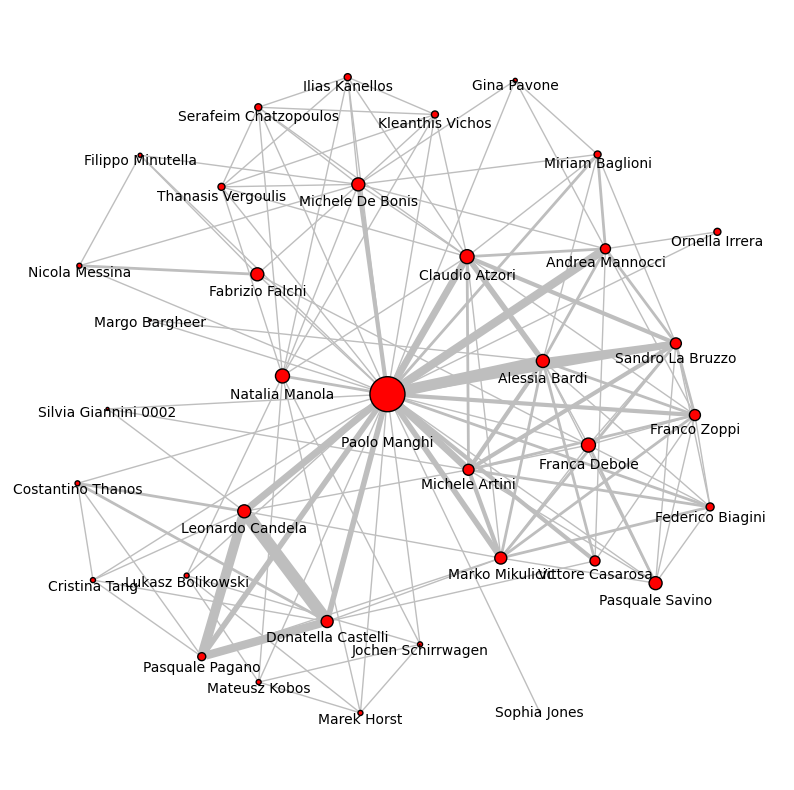

In [82]:
I = G.induced_subgraph(G.neighborhood(G.vs.find(name_eq = 'Paolo Manghi').index))
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(I, target=ax, vertex_size=I.vs['degree'], edge_width=I.es['n_joint_papers'], vertex_label=I.vs['name'], vertex_label_size=10, vertex_label_dist=2, edge_color='gray')

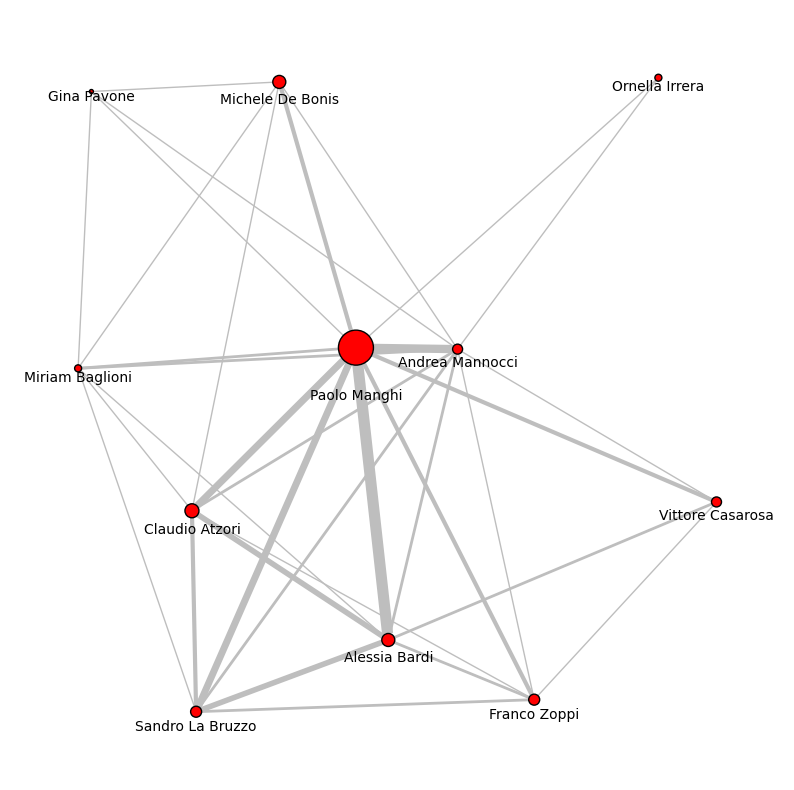

In [138]:
I = G.induced_subgraph(G.neighborhood(G.vs.find(name_eq = 'Andrea Mannocci').index))
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(I, vertex_label=I.vs['name'], target=ax, vertex_size=I.vs['degree'], edge_width=I.es['n_joint_papers'], vertex_label_size=10, vertex_label_dist=2, edge_color='gray')

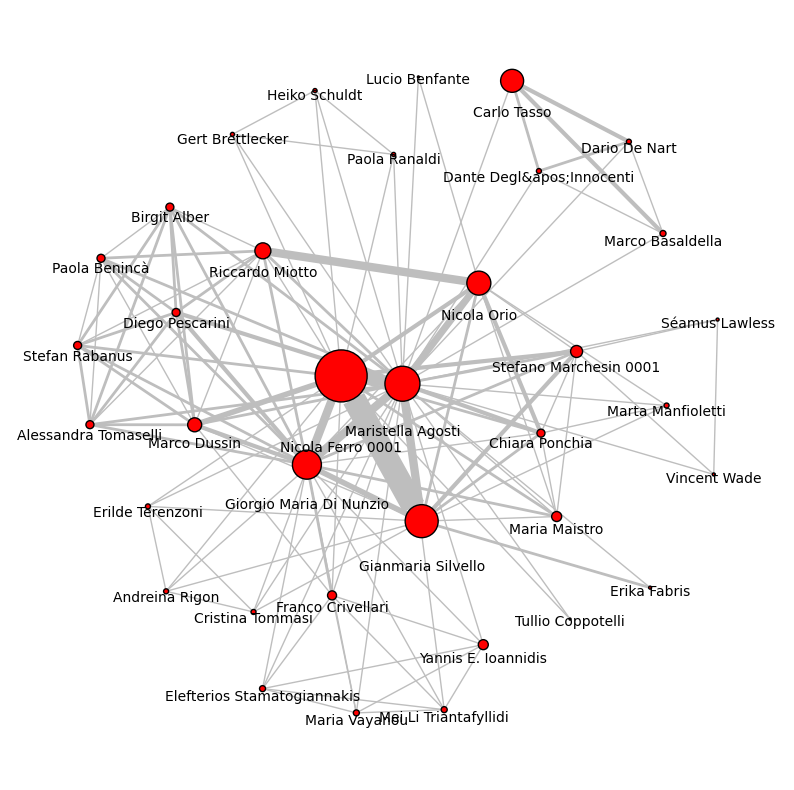

In [139]:
I = G.induced_subgraph(G.neighborhood(G.vs.find(name_eq = 'Maristella Agosti').index))
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(I, target=ax, vertex_size=I.vs['degree'], edge_width=I.es['n_joint_papers'], vertex_label=I.vs['name'], vertex_label_size=10, vertex_label_dist=2, edge_color='gray')

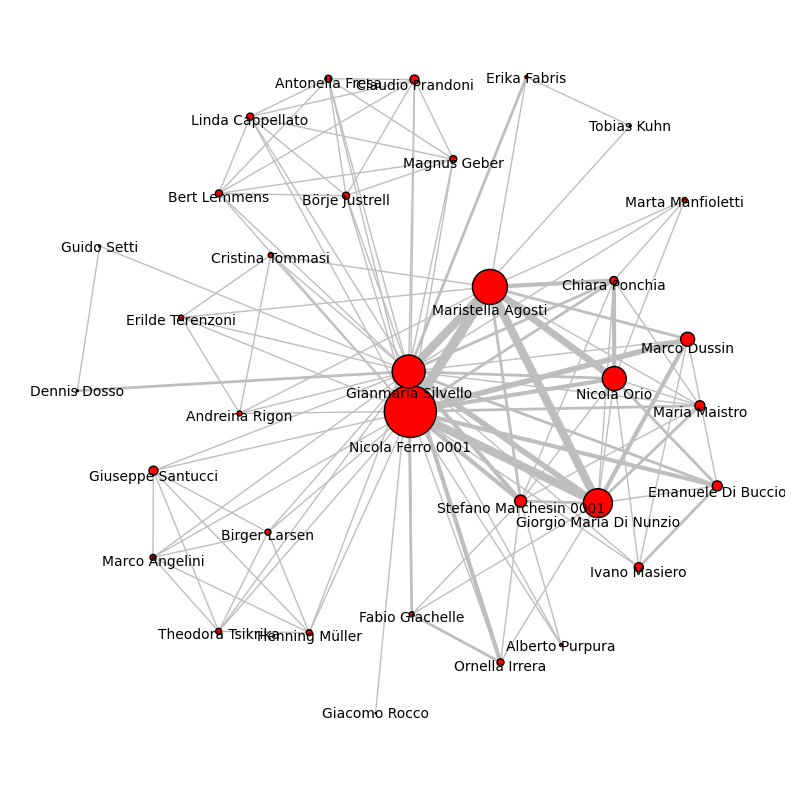

In [209]:
I = G.induced_subgraph(G.neighborhood(G.vs.find(name_eq = 'Gianmaria Silvello').index))
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(I, target=ax, vertex_size=I.vs['degree'], edge_width=I.es['n_joint_papers'], vertex_label=I.vs['name'], vertex_label_size=10, vertex_label_dist=1, edge_color='gray')

### Interpolating affiliations from PDFs

In [94]:
def interpolate(json_name):
    json_path =  '../data/processed/grobid/' + json_name.replace('/', '_') + '.json'
    # print(json_path)
    if os.path.exists(json_path):
        with open(json_path, 'rb') as f:
            try:
                article = json.loads(f.read())
                authors = []
                for a in article['bibliography']['authors']:
                    name = a['person_name']['first_name'] 
                    surname = a['person_name']['surname']
                    fullname = str(name) + ' ' + str(surname)
                    orgs = [org['institution'] for org in a['affiliations']]
                    # print(fullname, orgs)
                    authors.append([fullname, orgs])
                return [json_path, authors]
            except json.JSONDecodeError:
                print('json error in %s', json_path)

# pd.DataFrame(papers.apply(lambda row: interpolate(row['key']), axis=1))
affiliations = pd.DataFrame(papers.apply(lambda row: interpolate(row['key']), axis=1), columns=['data'])
affiliations = affiliations[affiliations.data.notna()]
affiliations = pd.DataFrame(affiliations["data"].to_list(), columns=['paper', 'authors'])
affiliations = affiliations.explode('authors').reset_index()
affiliations = affiliations.join(pd.DataFrame(affiliations.authors.to_list(), columns=['name', 'orgs']))
affiliations = affiliations.explode('orgs')
affiliations

json error in %s ../data/processed/grobid/conf_ircdl_BasileGLS09.json
json error in %s ../data/processed/grobid/conf_ircdl_BolettieriFLMPRS09.json
json error in %s ../data/processed/grobid/conf_ircdl_FerilliBBE09.json


,index,paper,authors,name,orgs
0,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Maria Ambrosino, [Università degli Studi di S...",Maria Ambrosino,Università degli Studi di Salerno
1,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Vanja Annunziata, [Università degli Studi di ...",Vanja Annunziata,Università degli Studi di Salerno
2,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Maria Pellegrino, [Università degli Studi di ...",Maria Pellegrino,Università degli Studi di Salerno
3,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Vittorio Scarano, [Università degli Studi di ...",Vittorio Scarano,Università degli Studi di Salerno
4,1,../data/processed/grobid/conf_ircdl_BagchiD23....,"[Mayukh Bagchi, [University of Trento, None]]",Mayukh Bagchi,University of Trento
...,...,...,...,...,...
1047,315,../data/processed/grobid/conf_ircdl_GentileBS0...,"[Pierpaolo Basile, [Università di Bari Via E]]",Pierpaolo Basile,Università di Bari Via E
1048,315,../data/processed/grobid/conf_ircdl_GentileBS0...,"[Giovanni Semeraro, [Università di Bari Via E]]",Giovanni Semeraro,Università di Bari Via E
1049,316,../data/processed/grobid/conf_ircdl_JonesM09.json,"[Sophia Jones, [University of Nottingham]]",Sophia Jones,University of Nottingham
1050,316,../data/processed/grobid/conf_ircdl_JonesM09.json,"[Paolo Manghi, [Consiglio Nazionale delle Rice...",Paolo Manghi,Consiglio Nazionale delle Ricerche Pisa


In [95]:
affiliations.replace('Consiglio Nazionale delle Ricerche', 'CNR', inplace=True)
affiliations.replace('National Research Council', 'CNR', inplace=True)
affiliations.replace('Italian National Research Council', 'CNR', inplace=True)
affiliations.replace('National Research Council (CNR)', 'CNR', inplace=True)
affiliations.replace('Italian National Research Council (CNR)', 'CNR', inplace=True)

affiliations.replace('Alessandro Faedo" -CNR', 'ISTI-CNR', inplace=True)
affiliations.replace('Italian National Research Council (ISTI-CNR)', 'ISTI-CNR', inplace=True)
affiliations.replace('CNR-ISTI -National Research Council', 'ISTI-CNR', inplace=True)
affiliations.replace('"A. Faedo" -CNR', 'ISTI-CNR', inplace=True)
affiliations.replace('Faedo" -CNR', 'ISTI-CNR', inplace=True)
affiliations.replace('ISTI -CNR', 'ISTI-CNR', inplace=True)
affiliations.replace('Consiglio Nazionale delle Ricerche "A. Faedo"', 'ISTI-CNR', inplace=True)
affiliations.replace('CNR-ISTI -National Research Council "Alessandro Faedo"', 'ISTI-CNR', inplace=True)
affiliations.replace('Consiglio Nazionale delle Ricerche Pisa', 'ISTI-CNR', inplace=True)
affiliations.replace('CNR Pisa', 'ISTI-CNR', inplace=True)
affiliations.replace('Consiglio Nazionale delle Ricerche Via G. Moruzzi', 'ISTI-CNR', inplace=True)

affiliations.replace('University of Bari Aldo Moro', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università di Bari', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('University of Bari', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università degli Studi di Bari "Aldo Moro"', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('LACAM Laboratory Università degli Studi di Bari "Aldo Moro"', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università degli Studi di Bari "A. Moro"', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università degli Studi di Bari', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università di Bari -DIRIUM', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università di Bari -DIB', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università degli Studi di Bari Aldo Moro', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università di Bari via E', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università di Bari via', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('Università di Bari Via E', 'University of Bari "Aldo Moro"', inplace=True)
affiliations.replace('University of Bari A', 'University of Bari "Aldo Moro"', inplace=True)

affiliations.replace('Sapienza Università di Roma', 'Sapienza University of Rome', inplace=True)
affiliations.replace('University La Sapienza', 'Sapienza University of Rome', inplace=True)
affiliations.replace('SAPIENZA Università di Roma', 'Sapienza University of Rome', inplace=True)
affiliations.replace('Sapienza -Università di Roma', 'Sapienza University of Rome', inplace=True)
affiliations.replace('Università degli studi di Roma "La Sapienza"', 'Sapienza University of Rome', inplace=True)
affiliations.replace('La Sapienza" University of Rome', 'Sapienza University of Rome', inplace=True)

affiliations.replace('Alma Mater Studiorum Università di Bologna', 'University of Bologna', inplace=True)
affiliations.replace('University of Bologna Mura A', 'University of Bologna', inplace=True)

affiliations.replace('University of Udine Via delle Scienze', 'University of Udine', inplace=True)
affiliations.replace('Università degli Studi di Udine', 'University of Udine', inplace=True)

affiliations.replace('Università di Napoli Federico II', 'University of Naples Federico II', inplace=True)

affiliations.replace('University of Padova', 'University of Padua', inplace=True)
affiliations.replace('University of Padova Padova', 'University of Padua', inplace=True)
affiliations.replace('University of Padua Via Beato Pellegrino', 'University of Padua', inplace=True)
affiliations.replace('Università degli Studi di Padova', 'University of Padua', inplace=True)
affiliations.replace('University of Padua Via Gradenigo', 'University of Padua', inplace=True)
affiliations.replace('University of Padua Piazza Capitaniato', 'University of Padua', inplace=True)

affiliations.replace('Università degli Studi di Modena e Reggio Emilia', 'University of Modena and Reggio Emilia', inplace=True)
affiliations.replace('Università Degli Studi di Modena e Reggio Emilia', 'University of Modena and Reggio Emilia', inplace=True)
affiliations.replace('Università di Modena e Reggio Emilia', 'University of Modena and Reggio Emilia', inplace=True)

affiliations.replace('OpenAIRE', 'OpenAIRE AMKE', inplace=True)

affiliations.replace('fullbrain.org/ {mirko', 'fullbrain.org', inplace=True)

# affiliations.replace('', '', inplace=True)

In [96]:
affiliations.orgs.unique()

array(['Università degli Studi di Salerno', 'University of Trento', None,
       'Dublin City University (DCU)', 'ISTI-CNR', 'OpenAIRE AMKE',
       'University of Bari "Aldo Moro"', 'CNR',
       'University of Goettingen', 'Sapienza University of Rome',
       'Univ. Lille', 'Brumfield Labs',
       'Università degli studi di Firenze', 'University of Udine',
       'University of Naples Federico II',
       'University of Modena and Reggio Emilia', nan,
       'Rivne State Humanitarian University', "King's College London",
       'University of Padua', 'University of Milan',
       'University of Calabria', 'Università di Torino',
       'University of Parma', 'Bayerische Staatsbibliothek',
       'University of Bologna',
       'CNR Biblioteca Area territoriale di Ricerca di Bologna',
       'CNR IMM-BO', 'LO', 'Ventspils University of Applied Sciences',
       'University of Haifa', 'Hebrew University',
       'Bayerische Staaatsbibliothek Munich',
       'Museum Galileo Digital Li

In [97]:
affiliations.groupby('orgs').count().sort_values(by='paper', ascending=False)[:25]

,index,paper,authors,name
orgs,,,,
University of Padua,170,170,170,170
"University of Bari ""Aldo Moro""",149,149,149,149
ISTI-CNR,84,84,84,84
CNR,69,69,69,69
Sapienza University of Rome,62,62,62,62
University of Udine,59,59,59,59
University of Modena and Reggio Emilia,40,40,40,40
University of Bologna,34,34,34,34
University of Parma,18,18,18,18


In [98]:
affiliations

,index,paper,authors,name,orgs
0,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Maria Ambrosino, [Università degli Studi di S...",Maria Ambrosino,Università degli Studi di Salerno
1,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Vanja Annunziata, [Università degli Studi di ...",Vanja Annunziata,Università degli Studi di Salerno
2,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Maria Pellegrino, [Università degli Studi di ...",Maria Pellegrino,Università degli Studi di Salerno
3,0,../data/processed/grobid/conf_ircdl_AmbrosinoA...,"[Vittorio Scarano, [Università degli Studi di ...",Vittorio Scarano,Università degli Studi di Salerno
4,1,../data/processed/grobid/conf_ircdl_BagchiD23....,"[Mayukh Bagchi, [University of Trento, None]]",Mayukh Bagchi,University of Trento
...,...,...,...,...,...
1047,315,../data/processed/grobid/conf_ircdl_GentileBS0...,"[Pierpaolo Basile, [Università di Bari Via E]]",Pierpaolo Basile,"University of Bari ""Aldo Moro"""
1048,315,../data/processed/grobid/conf_ircdl_GentileBS0...,"[Giovanni Semeraro, [Università di Bari Via E]]",Giovanni Semeraro,"University of Bari ""Aldo Moro"""
1049,316,../data/processed/grobid/conf_ircdl_JonesM09.json,"[Sophia Jones, [University of Nottingham]]",Sophia Jones,University of Nottingham
1050,316,../data/processed/grobid/conf_ircdl_JonesM09.json,"[Paolo Manghi, [Consiglio Nazionale delle Rice...",Paolo Manghi,ISTI-CNR


In [99]:
collabs = affiliations.dropna().groupby('paper').agg({'orgs': set}).reset_index()['orgs']\
                        .apply(lambda orgs: list(itr.combinations(orgs, 2)))\
                        .explode().dropna()
collabs.to_list()

[('University of Verona', 'University of Padua'),
 ('University of Verona Lungadige Porta Vittoria', 'University of Padua'),
 ('University of Athens Panepistimiopolis', 'University of Padua'),
 ('Soprintendenza Archivistica per il Veneto', 'Ufficio Archivi'),
 ('Soprintendenza Archivistica per il Veneto', 'University of Padua'),
 ('Ufficio Archivi', 'University of Padua'),
 ('Trinity College Dublin', 'University of Padua'),
 ('University of Udine', 'Dalhousie University'),
 ('Technical University of Sofia', 'University of Calabria'),
 ('Technical University of Sofia', 'University of Belgrade'),
 ('Technical University of Sofia', 'Mathematical Institute of the S.A.S.A'),
 ('University of Calabria', 'University of Belgrade'),
 ('University of Calabria', 'Mathematical Institute of the S.A.S.A'),
 ('University of Belgrade', 'Mathematical Institute of the S.A.S.A'),
 ('Roma Tre University', 'Vatican Secret Archives'),
 ('Sapienza University of Rome', 'Aalborg University'),
 ('Sapienza Unive

In [53]:
O = ig.Graph.TupleList(
      edges=collabs.to_list(),
      vertex_name_attr='name',
      directed=False
      )

In [54]:
O.vcount()

127

In [55]:
O.ecount()

179

In [56]:
O.es['n_joint_papers'] = 1
O = O.simplify(combine_edges='sum')

In [57]:
O.vs['degree'] = O.degree()

In [58]:
O.vs[0]

igraph.Vertex(<igraph.Graph object at 0x121315450>, 0, {'name': 'University of Verona', 'degree': 1})

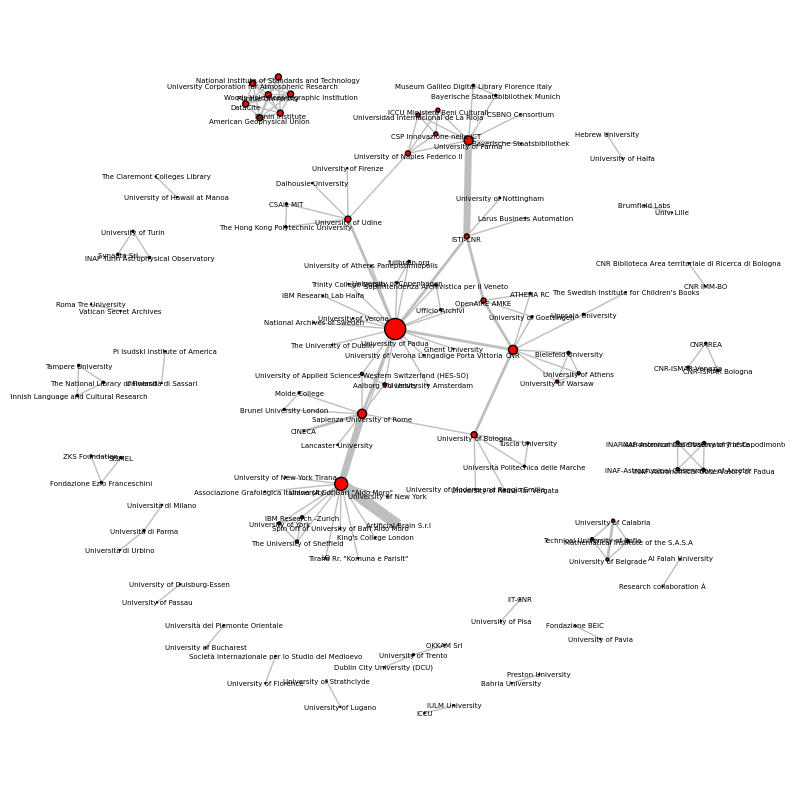

In [147]:
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(O, target=ax, vertex_size=O.vs['degree'], edge_width=O.es['n_joint_papers'], vertex_label=O.vs['name'], vertex_label_size=5, vertex_label_dist=1, edge_color='gray')

In [60]:
components = O.connected_components()
components

In [142]:
highest_degree = sorted(O.vs, key=lambda v: v['degree'], reverse=True)
highest_degree[:25]

[igraph.Vertex(<igraph.Graph object at 0x121315450>, 1, {'name': 'University of Padua', 'degree': 21}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 29, {'name': 'University of Bari "Aldo Moro"', 'degree': 13}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 15, {'name': 'Sapienza University of Rome', 'degree': 9}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 31, {'name': 'CNR', 'degree': 9}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 43, {'name': 'University of Parma', 'degree': 9}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 7, {'name': 'University of Udine', 'degree': 6}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 18, {'name': 'University of Bologna', 'degree': 6}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 117, {'name': 'University Corporation for Atmospheric Research', 'degree': 6}),
 igraph.Vertex(<igraph.Graph object at 0x121315450>, 118, {'name': 'American Geophysical Union', 'degree': 6}),
 igraph.Vertex(<igraph

<Axes: xlabel='name'>

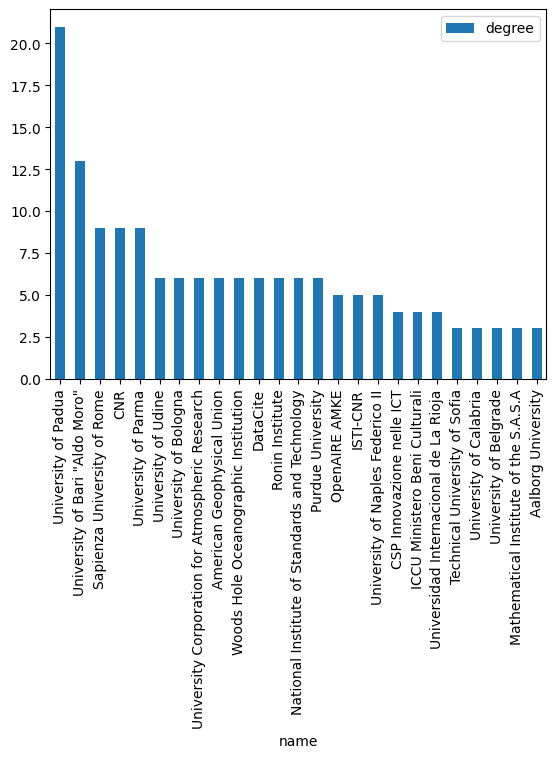

In [143]:
pd.DataFrame([(n['name'], n['degree']) for n in highest_degree], columns=['name', 'degree'])[:25].plot.bar(x='name')


In [62]:
highest_collab = sorted(O.es, key=lambda v: v['n_joint_papers'], reverse=True)
for e in highest_collab[:35]:
    print(O.vs[e.source]['name'] + ' + ' + O.vs[e.target]['name'] + ' = ' + str(e['n_joint_papers']))

University of Bari "Aldo Moro" + Artificial Brain S.r.l = 8.0
Sapienza University of Rome + University of Bari "Aldo Moro" = 5.0
ISTI-CNR + University of Parma = 5.0
University of Padua + University of Udine = 2.0
University of Padua + Sapienza University of Rome = 2.0
University of Padua + ISTI-CNR = 2.0
University of Padua + CNR = 2.0
University of Calabria + University of Belgrade = 2.0
Sapienza University of Rome + CINECA = 2.0
University of Bologna + CNR = 2.0
OpenAIRE AMKE + ISTI-CNR = 2.0
OpenAIRE AMKE + CNR = 2.0
University of Verona + University of Padua = 1.0
University of Padua + University of Verona Lungadige Porta Vittoria = 1.0
University of Padua + University of Athens Panepistimiopolis = 1.0
University of Padua + Soprintendenza Archivistica per il Veneto = 1.0
University of Padua + Ufficio Archivi = 1.0
University of Padua + Trinity College Dublin = 1.0
University of Padua + Aalborg University = 1.0
University of Padua + University of Applied Sciences Western Switzerlan

In [63]:
organisations = affiliations[['orgs','name']].groupby('orgs').agg(set).reset_index()
organisations

,orgs,name
0,ATHENA RC,"{Serafeim Chatzopoulos, Thanasis Vergoulis, Kl..."
1,Aalborg University,"{Birger Larsen, Tanja Svarre}"
2,Al Falah University,{Mohanad Halaweh}
3,American Geophysical Union,{Shelley Stall}
4,Artificial Brain S.r.l,"{D Redavid, Incoronata Villani, Domenico Redavid}"
...,...,...
150,Ventspils University of Applied Sciences,"{Gints Jasmonts, Karina Šķirmante, Silga Sviķe}"
151,Woods Hole Oceanographic Institution,{Danie Kinkade}
152,Yonsei University,"{Robert Allen, Yoonmi Chu}"
153,ZKS Foundation,{Alfredo Cosco}


In [64]:
organisations['size'] = organisations.name.str.len()
organisations.sort_values(by='size', ascending=False)

,orgs,name,size
97,"University of Bari ""Aldo Moro""","{Antonio Felle, Michelangelo Ceci, N Barbuti, ...",46
117,University of Padua,"{Lucio Benfante, Maristella Agosti, Ivano Masi...",44
15,CNR,"{Leonardo Canova, Maurizio Sanesi, Silvia Gian...",44
48,ISTI-CNR,"{Daniele Metilli, Cesare Concordia, Gina Pavon...",34
127,University of Udine,"{Beatrice Portelli, Marco Peressotti, Dante De...",31
...,...,...,...
29,Emilia Romagna Region,{Stefano Vitali},1
94,University of Athens,{Natalia Manola},1
93,University of Applied Sciences Western Switzer...,{Henning Müller},1
92,University Corporation for Atmospheric Research,{Sophie Hou},1


In [179]:
organisations[organisations.orgs == 'University of Athens and Athena Research Center'].name.values

array([{'Yannis Foufoulas', 'Natalia Manola', 'Harry Dimitropoulos', 'Tasos Giannakopoulos'}],
      dtype=object)

### Dump core set of papers for other notebooks

In [66]:
# papers.to_pickle('../data/processed/papers.pkl')